In [44]:

# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

from fbprophet import Prophet

In [45]:
from DataReader import DataReader
dr = DataReader()
train_df, test_df = dr.get_raw_data()

In [46]:
train_df = train_df[train_df.close==0]
train_df = train_df[train_df.price_am!=-1]
train_df = train_df[train_df.price_pm!=-1]

In [47]:
df = train_df[["datetime", "y"]]
df["ds"] = df.datetime
df = df.drop("datetime", axis=1)
df.head()

/Users/tatsukikoga/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,y,ds
187,16,2011-01-04
188,16,2011-01-05
189,13,2011-01-06
190,14,2011-01-07
191,16,2011-01-08


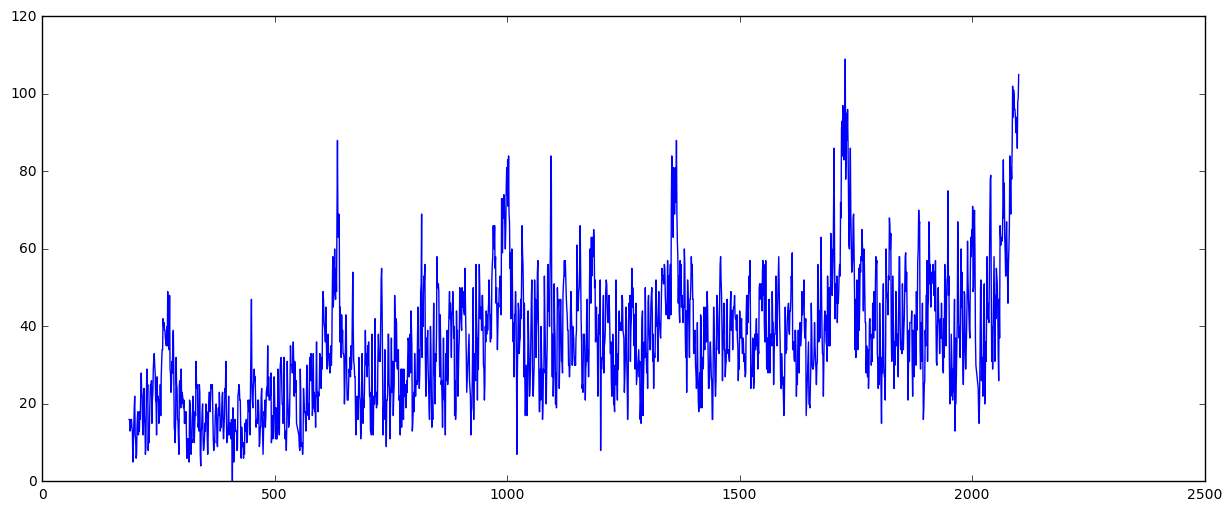

In [48]:
plt.plot(df.y)

In [49]:
event_df_train = pd.DataFrame({
  'holiday': 'clinet_train',
  'ds': train_df[train_df.client == 1].datetime,
})
event_df_test = pd.DataFrame({
  'holiday': 'clinet_test',
  'ds': test_df[test_df.client == 1].datetime,
})

event_df = pd.concat((event_df_train, event_df_test))

m = Prophet(weekly_seasonality=True, yearly_seasonality=True, holidays=event_df)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2249,2017-03-27,86.556324,75.263560,96.773255
2250,2017-03-28,83.808084,73.112716,94.248801
2251,2017-03-29,84.176018,74.419854,94.198769
2252,2017-03-30,85.647720,76.361404,95.656162
2253,2017-03-31,89.587197,80.218688,100.585042


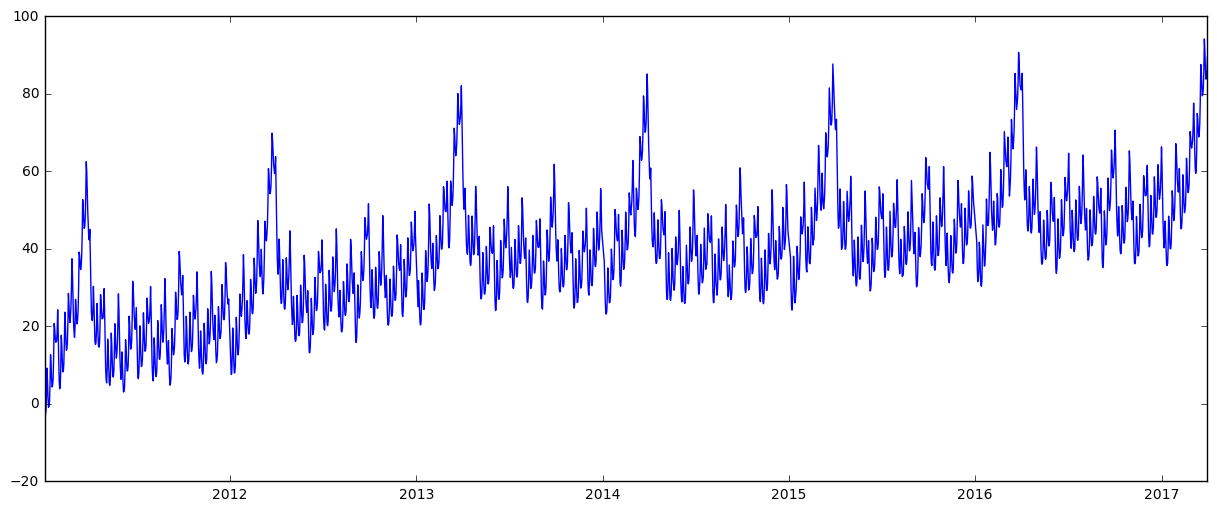

In [50]:
plt.plot(forecast.ds, forecast.yhat)

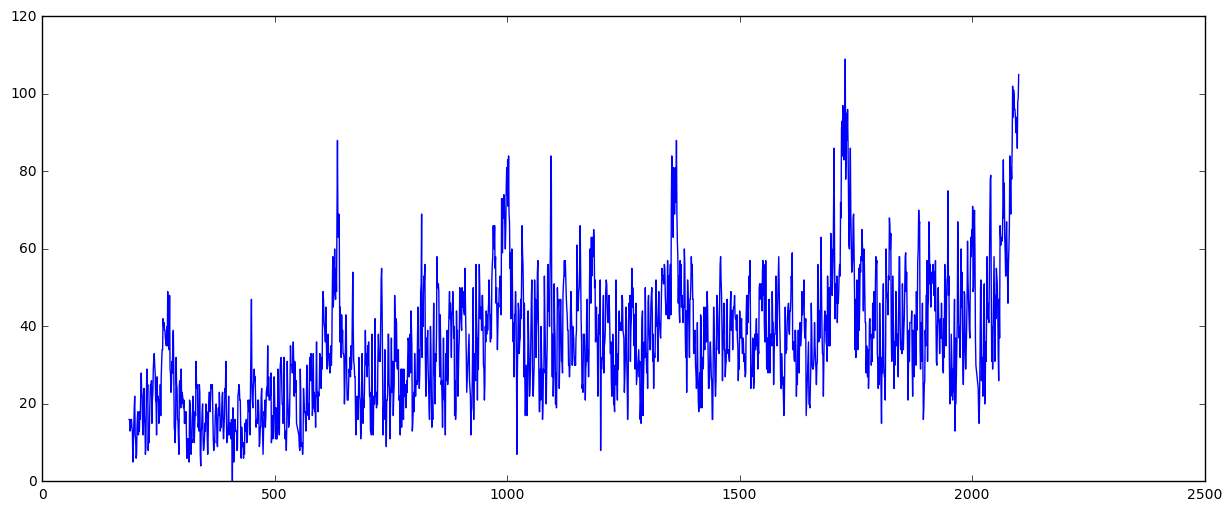

In [51]:
plt.plot(df.y)

In [52]:
test_df.datetime.head()

0    2016-04-01
1    2016-04-02
2    2016-04-03
3    2016-04-04
4    2016-04-05
Name: datetime, dtype: object

In [53]:
forecast[forecast.ds=='2016-04-01']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,clinet_test,clinet_test_lower,clinet_test_upper,clinet_train,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1889,2016-04-01,49.150572,49.150572,49.150572,71.096995,91.030339,0.0,0.0,0.0,0.0,...,32.294782,32.294782,32.294782,0.324557,0.324557,0.324557,23.089583,23.089583,23.089583,81.445354


In [54]:
ans = forecast[1889:]
len(ans) == len(test_df)

True

In [55]:
ans = ans.reset_index()
test_df = test_df.reset_index()

In [56]:
ans_ = pd.concat([ans, test_df], axis=1)
ans_

,index,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,clinet_test,clinet_test_lower,clinet_test_upper,...,yearly,yearly_lower,yearly_upper,yhat,index,datetime,client,close,price_am,price_pm
0,1889,2016-04-01,49.150572,49.150572,49.150572,71.096995,91.030339,0.0,0.0,0.0,...,23.089583,23.089583,23.089583,81.445354,0,2016-04-01,1,0,3,2
1,1890,2016-04-02,49.165634,49.165634,49.165634,75.198348,95.607538,0.0,0.0,0.0,...,21.605066,21.605066,21.605066,85.322112,1,2016-04-02,0,0,5,5
2,1891,2016-04-03,49.180696,49.180696,49.180696,67.321169,87.159449,0.0,0.0,0.0,...,20.054191,20.054191,20.054191,77.859923,2,2016-04-03,1,0,2,2
3,1892,2016-04-04,49.195758,49.195758,49.195758,58.309580,78.655696,0.0,0.0,0.0,...,18.457874,18.457874,18.457874,68.604697,3,2016-04-04,1,0,1,1
4,1893,2016-04-05,49.210820,49.210820,49.210820,50.363963,70.557825,0.0,0.0,0.0,...,16.837117,16.837117,16.837117,60.454938,4,2016-04-05,0,0,1,1
5,1894,2016-04-06,49.225882,49.225882,49.225882,44.437785,64.943574,0.0,0.0,0.0,...,15.212600,15.212600,15.212600,55.450180,5,2016-04-06,1,0,1,1
6,1895,2016-04-07,49.240944,49.240944,49.240944,43.683279,62.186316,0.0,0.0,0.0,...,13.604284,13.604284,13.604284,52.657318,6,2016-04-07,1,0,1,1
7,1896,2016-04-08,49.256006,49.256006,49.256006,44.105282,65.193685,0.0,0.0,0.0,...,12.031034,12.031034,12.031034,54.377320,7,2016-04-08,0,0,1,1
8,1897,2016-04-09,49.271068,49.271068,49.271068,51.375571,70.942417,0.0,0.0,0.0,...,10.510279,10.510279,10.510279,60.417392,8,2016-04-09,1,0,2,2
9,1898,2016-04-10,49.286130,49.286130,49.286130,46.523684,66.417559,0.0,0.0,0.0,...,9.057705,9.057705,9.057705,56.305778,9,2016-04-10,1,0,1,1


In [57]:
ans_['y'] = (1 - ans_['close']) * ans_['yhat']

In [58]:
ans_[ans_.close==0].y.head()

0    81.445354
1    85.322112
2    77.859923
3    68.604697
4    60.454938
Name: y, dtype: float64

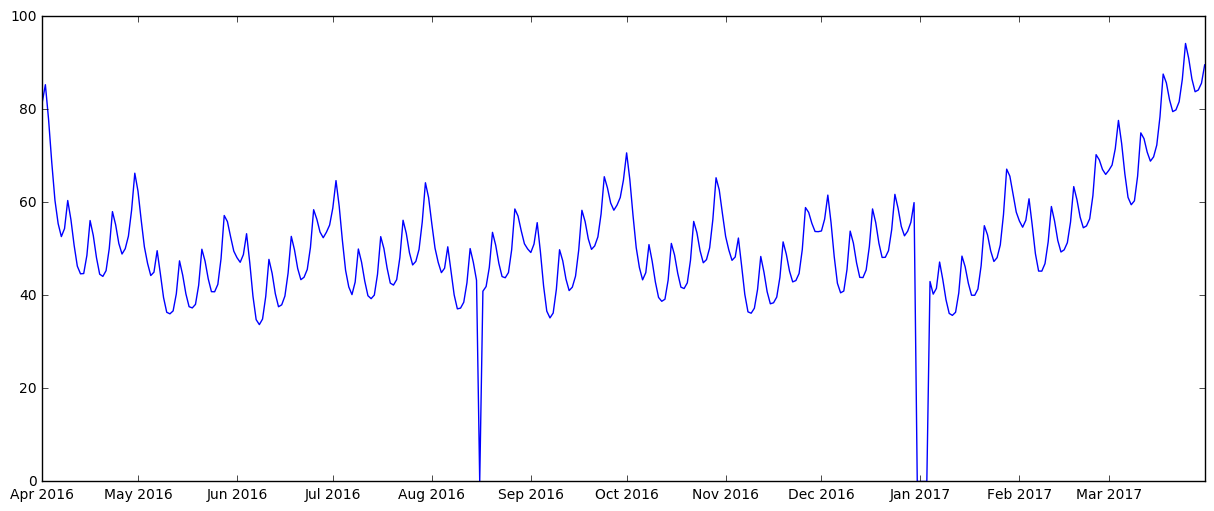

In [59]:
plt.plot(ans_.ds, ans_.y)

In [63]:
print(ans_[ans_.client==1].y.mean(), ans_[ans_.client==0].y.mean())
print(train_df[train_df.client==1].y.mean(), train_df[train_df.client==0].y.mean())

53.38014192282078 49.24083372509067
50.577669902912625 34.57100415923945


In [70]:
test_df[test_df.client==0].count()

index       200
datetime    200
client      200
close       200
price_am    200
price_pm    200
dtype: int64

In [61]:
submission = pd.concat([ans_.ds, ans_.y], axis=1)
submission.to_csv("submission.csv", index=False, header=False)